In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [61]:
df = pd.read_csv('fer2013/fer2013/fer2013.csv')
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [64]:
emotion_label= {0:'0 (anger)',1:'1 (disgust)',2:'2 (fear)',3:'3 (happiness)',4:'4 (sadness)',5:'5 (surprise)',6:'6 (neutral)'}
print(f"Column Emotion contains the unique values:\n{emotion_label.values()}")
print(f"Column Usage contains the unique values: {df['Usage'].unique()}")

Column Emotion contains the unique values:
dict_values(['0 (anger)', '1 (disgust)', '2 (fear)', '3 (happiness)', '4 (sadness)', '5 (surprise)', '6 (neutral)'])
Column Usage contains the unique values: ['Training' 'PublicTest' 'PrivateTest']


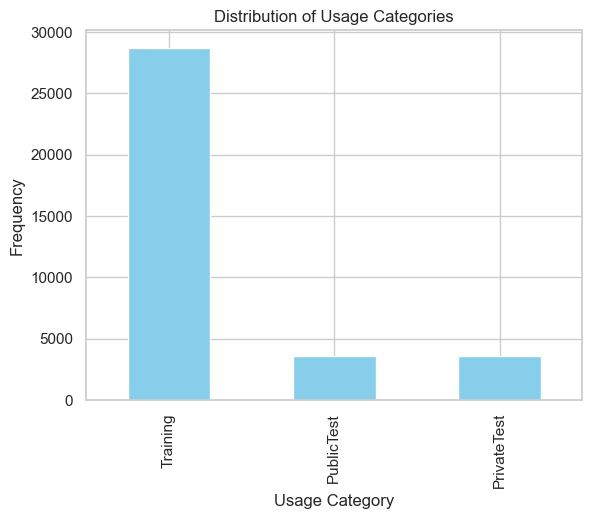

In [71]:
# Count the occurrences of each category in the 'Usage' column
usage_counts = df['Usage'].value_counts()

# Plot a bar chart of the frequencies
usage_counts.plot(kind='bar', title='Usage Distribution', color='skyblue')

# Add labels and title
plt.xlabel('Usage Category')
plt.ylabel('Frequency')
plt.title('Distribution of Usage Categories')

# Show the plot
plt.show()

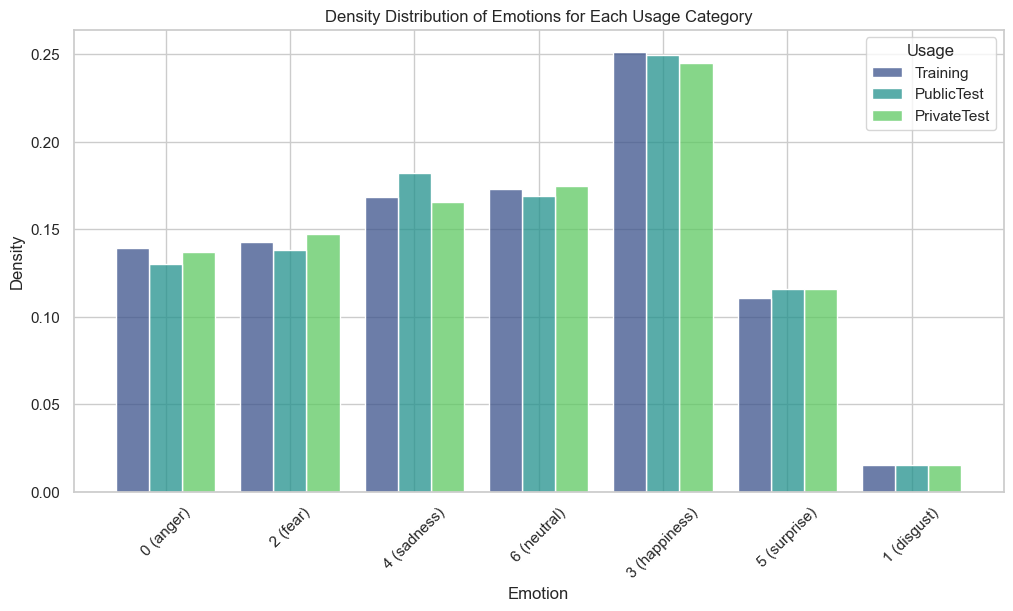

In [57]:
# Map the Emotion column using the dictionary
df['emotion_label'] = df['emotion'].map(emotion_label)
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a histogram with densities instead of counts
plt.figure(figsize=(12, 6))  # Adjust the figure size as necessary
sns.histplot(data=df, x='emotion_label', hue='Usage', multiple='dodge', palette='viridis', shrink=0.8, stat="density", common_norm=False)

# Add titles and labels
plt.title('Density Distribution of Emotions for Each Usage Category')
plt.xlabel('Emotion')
plt.ylabel('Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


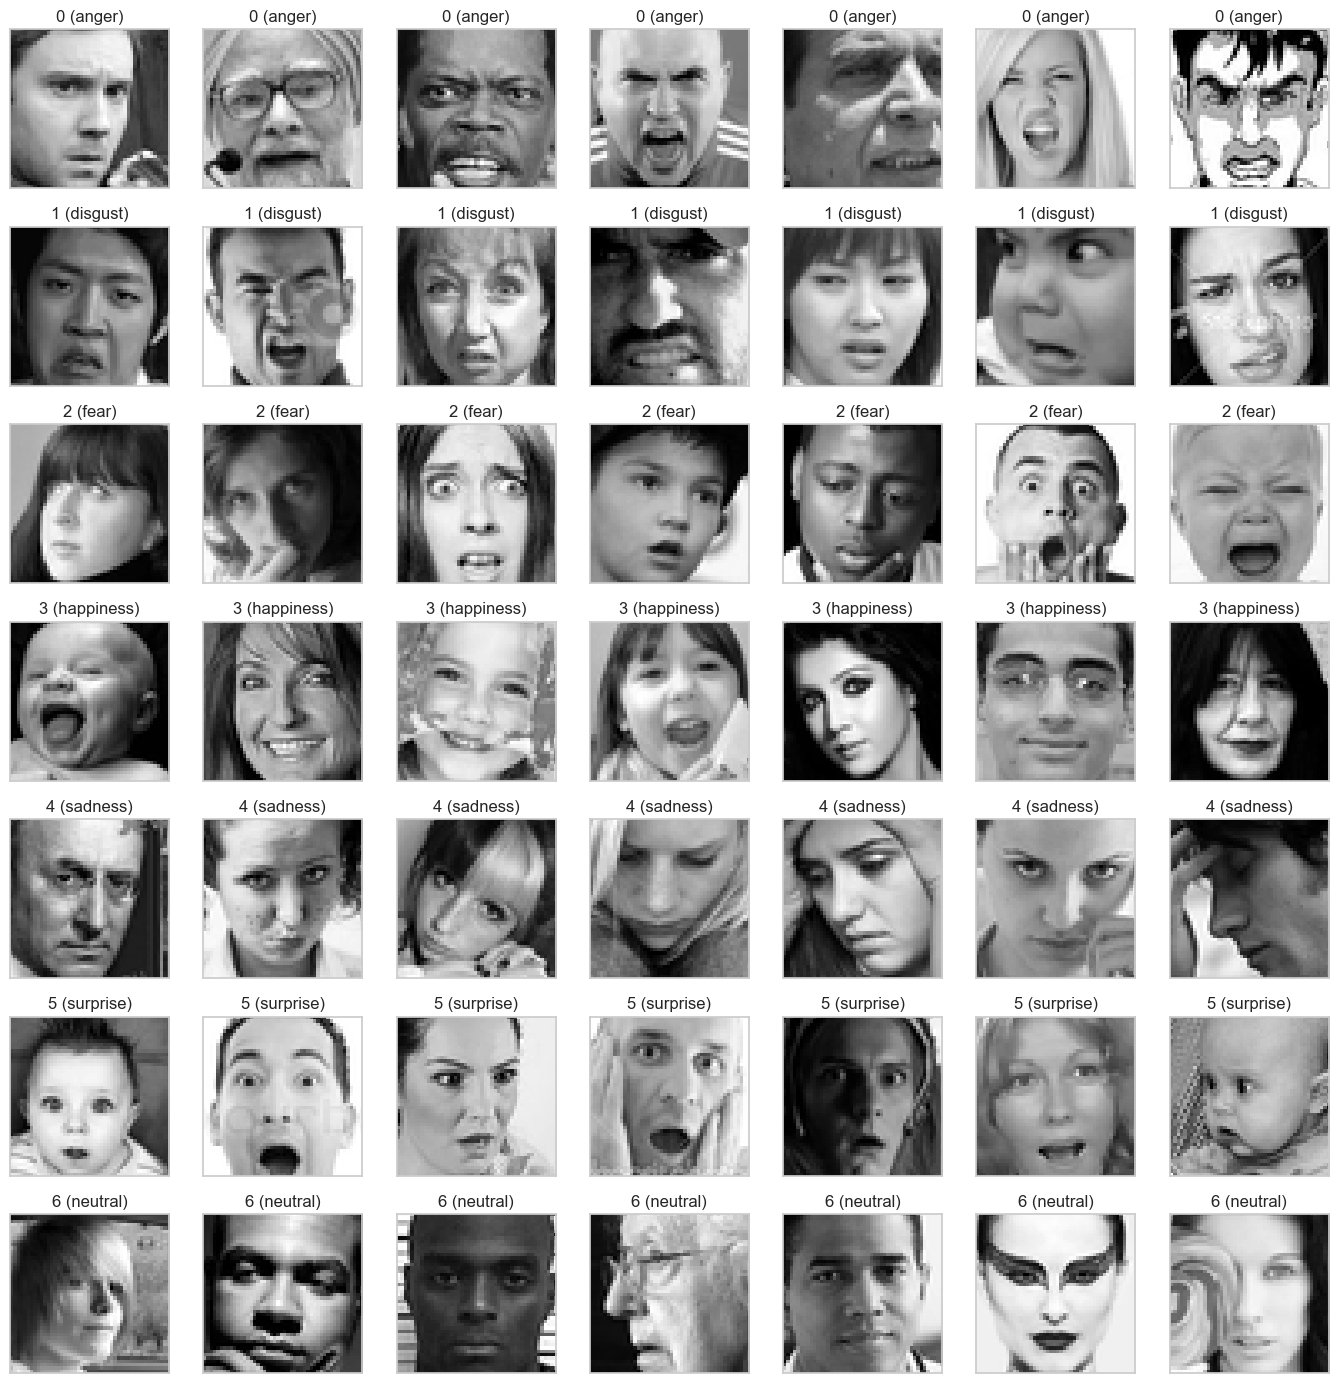

In [72]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        # reshaped to a 48x48 matrix and cast to float32.
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label [label])
        plt.tight_layout()